# Part I - (Dataset Exploration Title)
## by Matthew Wall

## Introduction

###### This document explores a data set containing roughly 16700 video games with titles, genre, and rankings. 

## Preliminary Wrangling

####Here we will take a look at the raw data, and will convert 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# general overview of the data shape on composition
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print (games.shape)
print (games.dtypes)
print (games.head(10))

(16719, 16)
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object
                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS 

### What is the structure of your dataset?

> There are 16719 games in the dataset with 16 features (Name, Platform  Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating. Most variables are numeric, however the objects Name, Platform, Genre, Publisher, Developer, and Rating have different labels. 

### What is/are the main feature(s) of interest in your dataset?

> The main focus for me on this dataset are going to be Name, Genre and Critic_Score/User_Score

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the rows, 'Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy', in the "Genre" column are going to help support my investigation

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.


['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


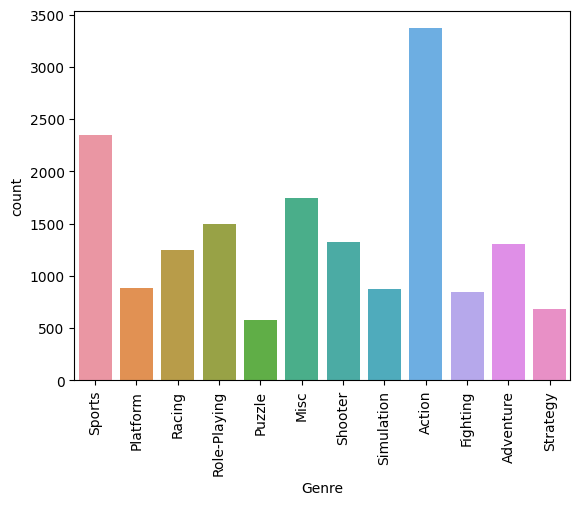

In [3]:
#Here I'm looking to see how many different genres are in the dataset. 
games.dropna(subset=['Genre'], inplace=True)
unique_genres = games['Genre'].unique()
print(unique_genres)

#I created a countplot to get an idea of how many games are in each Genre
genres = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']

sns.countplot(x='Genre', data=games, order=genres)
plt.xticks(rotation=90)
plt.show()

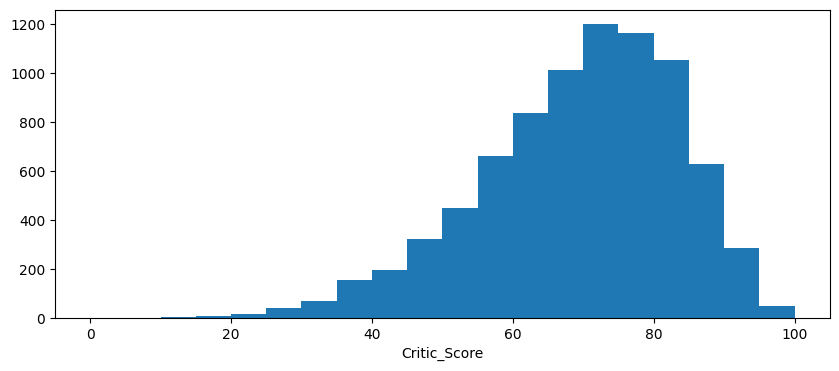

In [4]:
#Another standard scale plot, but also dropped all the NaN values, just in case they skewed results. 
games['Critic_Score'].dropna(inplace=True)
binsize = 5
bins = np.arange(0, games['Critic_Score'].max()+binsize, binsize)

plt.figure(figsize=[10, 4])
plt.hist(data = games, x= 'Critic_Score', bins = bins)
plt.xlabel('Critic_Score')
plt.show()

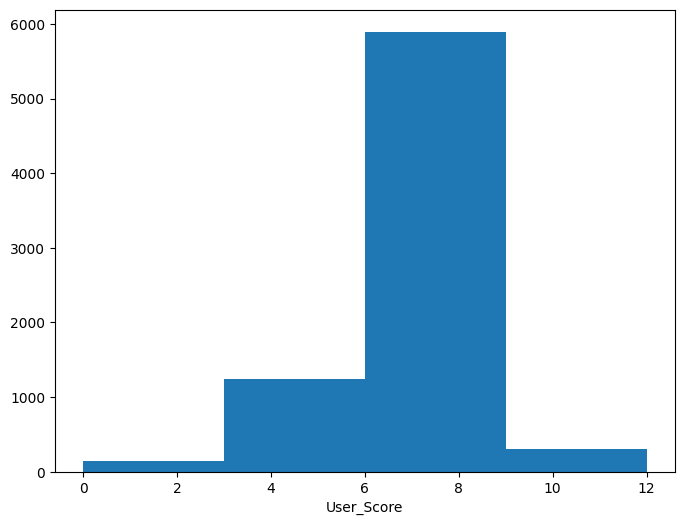

In [5]:
#Another standard plot, but had to replace the placeholder "tbd" into 'nan' to convert the object into a float, and then drop all
#all the NaN values. 
games['User_Score'] = games['User_Score'].replace('tbd', float('nan'))
games['User_Score'] = games['User_Score'].astype(float)
games['User_Score'].dropna(inplace=True)
binsize = 3
bins = np.arange(0, games['User_Score'].max()+binsize, binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = games, x= 'User_Score', bins = bins)
plt.xlabel('User_Score')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I looked Critic Score and User Score. Both look about as expected as the average is typically what you would see when a game is scored. No transformations needed. I also looked at the count of different games for each "Genre". It's about what you expect with "Action" being the most common type of game. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusual distritbutions, but I did drop the NaN values out of all the columns to give me a more accurate represenation of the scores and genre counts.  User_Score did need to have the value "TBD" (To be decided) transformed into NaN values so I could drop them and convert User_Score from an Object type to a float type. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).


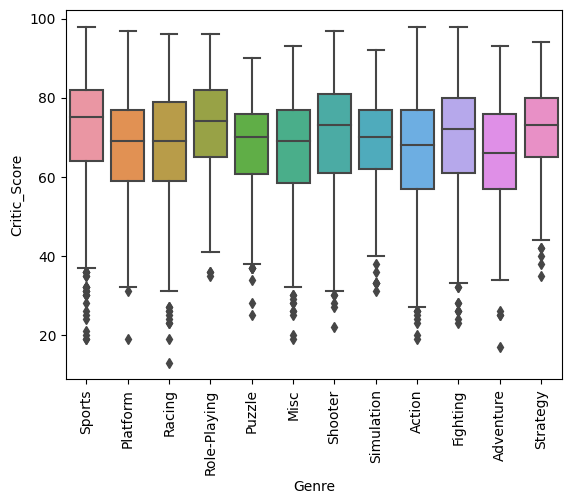

In [6]:
#Created a boxplot to give a visualization of where the most critics scores
#for each genre subattribute
sns.boxplot(x='Genre', y='Critic_Score', data=games, order=genres)
plt.xticks(rotation=90)
plt.show()

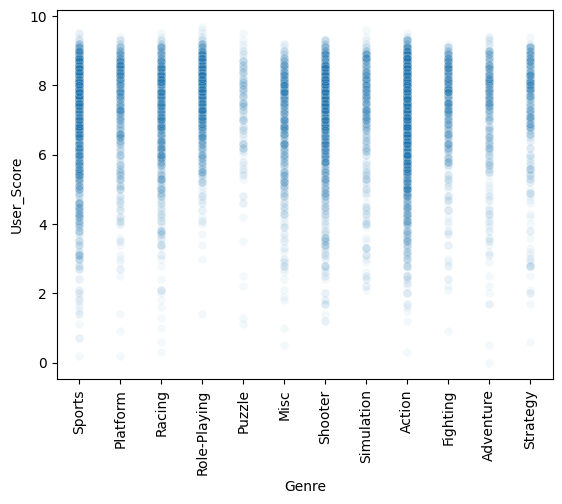

In [7]:
#Used a scatterplot and changed the density to show where most of the user score
#ratings were for each genre subattribute
sns.scatterplot(x='Genre', y='User_Score',data=games, alpha=0.05)
plt.xticks(rotation=90)

plt.show()

In [8]:
#Used a scattered barplot to show the correlation between user scores and
#critic scores. I added ticks to help differentiate the many critic score variables. 
games_cleaned = games.dropna(subset=['User_Score', 'Critic_Score'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Critic_Score', y='User_Score', data=games_cleaned)
plt.xticks([0, 20, 40, 60, 80, 100])
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> You can definitely see that the type of Genre and Critic_Score had a correlation in the boxplot chart. Using the scatterplot there didn't seem to be as much of a correlation between User_Score and the type of Genre. Using the clustered bar chart, there's definitely a correlation between Critic_Score and User_Score

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was definitely some genres that stood out ahead of the rest as far as higher Critic_Scores go. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.


In [9]:
#The Facet Plot with scatterplots is chosen for its ability to efficiently compare relationships 
#between 'Critic_Score' and 'User_Score' across multiple genres. The combination of visual elements, color encodings, and 
#layout considerations supports a comprehensive exploration of the dataset.

sns.set(style="whitegrid")
g = sns.lmplot(data=games, x='Critic_Score', y='User_Score', hue='Genre', col='Genre', col_wrap=4, markers='.', height=4, scatter_kws={'alpha':0.5})
plt.show()

In [10]:
#The scatter plot with multiple encodings is chosen for its effectiveness in visualizing relationships between 'Critic_Score'
#and 'User_Score' across different genres. The use of color and marker style encodings, along with additional elements like 
#legend and axes labels, contributes to the overall interpretability and aesthetic appeal of the plot.

sns.set(style="whitegrid")

# Create a Scatter Plot with Multiple Encodings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Critic_Score', y='User_Score', hue='Genre', style='Genre', data=games, palette='viridis', s=80, alpha=0.8)

# Add labels and title
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.title('Scatter Plot with Multiple Encodings')

# Add a legend
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  There was a general trend where higher 'Critic_Scores' tend to be associated with higher 'User_Scores' for specific genres. This positive correlation suggests that well-received games by critics also tend to be well-received by users.


### Were there any interesting or surprising interactions between features?

> I was able to identify potential outliers where the critic and user scores diverge significantly. These points could be interesting for further investigation, as they may represent games that are polarizing among critics and users.

## Conclusions
>In the context of exploring relationships between 'Critic_Score' and 'User_Score' across different genres using scatter plots, I observed the following:

>1.Positive Correlation:
I noticed a general trend where higher 'Critic_Scores' tend to be associated with higher 'User_Scores' for specific genres. This positive correlation suggests that well-received games by critics also tend to be well-received by users.

>2.Genre-Specific Patterns:
Different genres exhibit distinct patterns in the relationship between critic and user scores. For example, some genres like Puzzle, show stronger correlations, while others like shooter may have more variability or even exhibit different trends.

>3.Outliers and Anomalies:
I was able to identify potential outliers where the critic and user scores diverge significantly. These points could be interesting for further investigation, as they may represent games that are polarizing among critics and users.

>4. Density and Concentrations:
I examined the density of data points in different regions of the scatter plot can provide insights into the concentration of scores. Dense areas indicated a consensus among both critics and users, while sparse areas suggested diverse opinions.
Regarding features that may strengthen each other, a consistent and positive correlation between 'Critic_Score' and 'User_Score' across multiple genres is a strong observation. With the agreement between critics and users prevalent across various genres, it strengthens the reliability of both scores as indicators of a game's quality.

In [11]:
games.to_csv('video_games_clean.csv', index=False)